In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("sample_data/S02-hw-dataset.csv")
data.head(5) #первые 5 строк


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [12]:
data.info() #инфа о строках и столбцах
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [58]:
print(pd.DataFrame({'доля пропусков': data.isna().mean()})) #доля пропусков
print({'колво дубликатов' : data.duplicated().sum()}) #полностью идентичные строки

           доля пропусков
user_id           0.00000
age               0.04878
country           0.00000
purchases         0.00000
revenue           0.00000
{'колво дубликатов': np.int64(1)}


In [42]:
#поиск отриц чисел
shpion = []
infa = data.select_dtypes(include=[np.number]).columns
for col in infa:
    otric_chisla = data[data[col] < 0]
    if len(otric_chisla) > 0:
        print(f"в столбце {col} обнаружены отрицательные значения {len(otric_chisla)}")
        shpion.append(f"отрицательные значения в {col}")


в столбце purchases обнаружены отрицательные значения 1


In [47]:
#поиск нулей
shpion = []
infa = data.select_dtypes(include=[np.number]).columns
for col in infa:
    null = data[data[col] == 0]
    if len(null) > 0:
        print(f"в столбце {col} обнаружены нули {len(null)}")
        shpion.append(f"нули в {col}")

в столбце purchases обнаружены нули 3
в столбце revenue обнаружены нули 4


развалюхи с которых сыпится песок 1 шт
строка 6 user_id 6, age 120.0, purchases -1, revenue 785


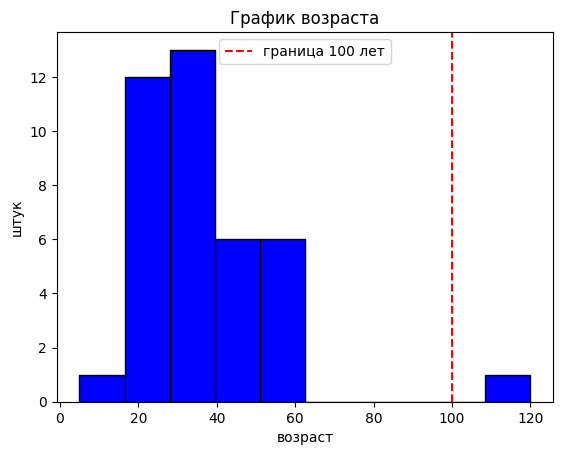

In [97]:
#поиск развалюх
age = data[data['age'] > 100]
age = age[~age['age'].isna()]
if len(age) > 0:
  print(f"развалюхи с которых сыпится песок {len(age)} шт")
  for ii, row in age.iterrows():
    print(f"строка {ii+1} user_id {row['user_id']}, age {row['age']}, purchases {row['purchases']}, revenue {row['revenue']}")


age_data = data['age']
plt.hist(age_data, color='blue', edgecolor='black')
plt.xlabel('возраст')
plt.ylabel('штук')
plt.title('График возраста')
plt.axvline(x=100, color='red', linestyle='--', label='граница 100 лет')
plt.legend()
plt.show()

In [99]:
#Проблемы датасета
#найден дубликат строки! это приведет к неправильному считыванию метрик и этот пользователь будет посчитан дважды
#найден человек с статусом purchases -1, нормально закупился -1 раз, ну или это возврат
#найдена развалюха около 120 лет и мелкий меньше 10 лет

In [109]:
print(pd.DataFrame({'колво': data['country'].value_counts(),'доля в %': (data['country'].value_counts(normalize=True) * 100).round(2)}))

         колво  доля в %
country                 
RU          13     31.71
FR          12     29.27
US           8     19.51
DE           6     14.63
CN           2      4.88
